In [1]:
from sklearn.datasets.samples_generator import make_blobs
import scipy.io
import csv
import os
import numpy as np

In [2]:
#Reference:
#   https://support.10xgenomics.com/single-cell/software/pipelines/latest/output/matrices
#   On how to process single cell output matrice on python

genome = "hg19"
matrices_dir = "./PCA/filtered_gene_bc_matrices"
human_matrix_dir = os.path.join(matrices_dir, genome)
mat = scipy.io.mmread(os.path.join(human_matrix_dir, "matrix.mtx"))

genes_path = os.path.join(human_matrix_dir, "genes.tsv")
gene_ids = np.array([row[0] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_names = np.array([row[1] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_ids_names = np.matrix([row for row in csv.reader(open(genes_path), delimiter="\t")])

barcodes_path = os.path.join(human_matrix_dir, "barcodes.tsv")
barcodes = np.array([row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")])

In [3]:
#Normalize the data. 
X, y = make_blobs(n_samples=100, centers=10, n_features=10, random_state=0)

In [37]:
print mat.shape
print gene_ids.shape
print gene_names.shape
print barcodes.shape

(32738, 2700)
(32738,)
(32738,)
(2700,)


In [44]:
X_mat = mat.todense()
X_mat = X_mat.transpose()

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.random_projection import sparse_random_matrix

In [75]:
def run_pca():
    pca = PCA(n_components=4, svd_solver='randomized')
    pca.fit(X_mat)
    PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
      svd_solver='randomized', tol=0.0, whiten=False)
    


In [94]:
Idim = []
Vdim = []
leng = len(pca.components_)


for j in range(leng):
    indexes = []
    vals = []
    for i in range(5):
        e = pca.components_[j].argmax()
        indexes.append(e)
        vals.append(pca.components_[j][e])
        pca.components_[j][e] = pca.components_[j][pca.components_[j].argmin()]
    Idim.append(indexes)
    Vdim.append(vals)
run_pca()
    
print Idim
genes = []
for n_pca in Idim:
    for index in n_pca:
        genes.append(gene_names[index])

values = []
for n_vals in Vdim:
    for v in n_vals:
        values.append(v)
values = np.array(values)
print "This is min: {},\t This is max: {}".format(values.min(), values.max())
print genes



[[17464, 21446, 27826, 16744, 32702], [5947, 18501, 26338, 7949, 7134], [23206, 13507, 19801, 556, 558], [12230, 17449, 21536, 15615, 28832]]
This is min: 0.01088556358,	 This is max: 0.0574420498398
['PSAP', 'RPL6', 'ACTG1', 'FCN1', 'MT-CO3', 'RPL29', 'RPS13', 'RPL26', 'RPL34', 'RPL35A', 'CALM1', 'TIMP1', 'CD3D', 'SH3BGRL3', 'CD52', 'PPIA', 'PRF1', 'RPLP0', 'RPL8', 'CST7']


In [80]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

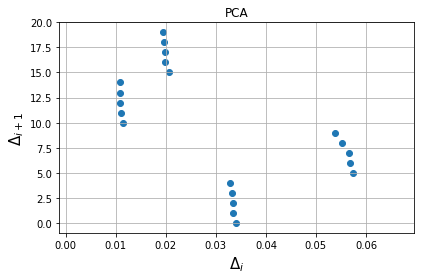

In [105]:
fig, ax = plt.subplots()
num = range(len(genes))
ax.scatter(values, num, alpha=1)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('PCA')

ax.grid(True)
fig.tight_layout()

plt.show()
